In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
import seaborn as sns

C:\Users\abc33\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abc33\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abc33\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abc33\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

## Apply ploting function for model

In [2]:
def plot_training(history, metrics=[]):
    """
    Plot training and validation statistics
    - accuracy vs epoch number
    - loss     vs epoch number

    From https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/
    """  

    # Loss
    loss = history.history['loss']

    epochs = range(len(loss))

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.title('Training loss')
    plt.legend()

    plt.figure()

    for metric in metrics:
      metric_value = history.history[metric]
      plt.plot(epochs, metric_value, 'b', label="Training " + metric)
      plt.title('Training  accuracy')
      plt.legend()

    plt.show()

# The Data

The dataset is called Fashion MNIST.

Rather than classifying images into one of ten digits,
you will classify images of clothing items into one of ten classes.

Here's the code to get the data.

In [3]:
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Determine 
# - the dimensions of the input by examining the first training example
# - the dimensions of the output (number of classes) by examinimg the targets
input_size = np.prod(X_train[0].shape)
output_size = np.unique(y_train).shape[0]

# input image dimensions
img_rows, img_cols = X_train[0].shape[0:2]

valid_size = X_train.shape[0] // 10

# Flatten the data to one dimension and normalize to range [0,1]
X_train = X_train.astype(np.float32).reshape(-1, input_size) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, input_size) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:valid_size], X_train[valid_size:]
y_valid, y_train = y_train[:valid_size], y_train[valid_size:]

### Create call backs
- Early Stopping
- Model Checkpoint

In [0]:
modelName = "class_model"

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.00005, patience=2, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

callbacks = [ es_callback,
              ModelCheckpoint(filepath=modelName + ".ckpt", monitor='acc', save_best_only=True)
          ]

## Task 1

Create a one layer Neural Network to perform classification (e.g., logistic regression) as we demonstrated in class.

No layers other than the one for classification.

In [42]:
# Classification
class_model = Sequential([ layers.Dense(output_size, activation="sigmoid", input_dim=input_size) ] )
class_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=["accuracy"])
class_model.fit(X_train, y_train, nb_epoch=10, validation_data=(X_valid, y_valid))

1688/1688 [==============================] - 4s 2ms/step - loss: 0.6296 - accuracy: 0.7915 - val_loss: 0.5239 - val_accuracy: 0.8363


## Task 2 (9 parts)

You will evaluate out of sample accuracy for several models and create a plot
- For number of layers in 2, 3,4 (more if you like)
- For number of units per layer in 10, 50, 200 (more if you like)
    - Using *same* number of units for each layer

The combination of choices for number of layers and number of units per layer gives you (at least) **9 models**.

- Evaluate the out of sample accuracy for each of the 9 models.
- Present the results in a table (created by code)


In [43]:
Unit = [10,50,200]
Layer = [2,3,4]

df = pd.DataFrame(columns=Layer, index=Unit)

accuracy = 0

for i in Unit:
    for j in Layer:
        # create a sequential model
            model = Sequential()
        for k in range(j-1):
                model.add(layers.Dense(i, activation=tf.nn.relu, input_dim=input_size))#这里的代码要改毕竟input_dim不能老是input_size
        model.add(layers.Dense(output_size, activation="sigmoid"))
        
        # compile and fit model
        metrics = [ "acc" ]
        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=metrics)
        model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks)
        
        # print summary()
        print(model.summary())
        
        # evaluate model using test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print("Test dataset: loss={tl:5.4f}, accuracy={ta:5.4f}".format(tl=test_loss, ta=test_accuracy))
        
        df.loc[i,j]=test_accuracy
        
        if accuracy < test_accuracy:
            accuracy = test_accuracy
            myModel = model

Epoch 1/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.8665 - acc: 0.5852 - val_loss: 0.5039 - val_acc: 0.8302
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4844 - acc: 0.8347 - val_loss: 0.4551 - val_acc: 0.8472
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4516 - acc: 0.8445 - val_loss: 0.4375 - val_acc: 0.8512
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4334 - acc: 0.8499 - val_loss: 0.4250 - val_acc: 0.8498
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4228 - acc: 0.8535 - val_loss: 0.4287 - val_acc: 0.8493
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4143 - acc: 0.8556 - val_loss: 0.4176 - val_acc: 0.8553
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4081 - acc: 0.8568 - val_loss: 0.4161 - val_acc: 0.8540
Epoch 8/10
1688/1688 [==============================] - 4s 3ms

**Following table is the accuracy table**

In [44]:
df

,2,3,4
10,0.848,0.8468,0.8405
50,0.8629,0.8738,0.8733
200,0.8771,0.8858,0.8686


**Highest Accuracy and Model**

In [45]:
print(accuracy)
print(myModel.summary())

0.8858000040054321
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_258 (Dense)            (None, 200)               157000    
_________________________________________________________________
dense_259 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_260 (Dense)            (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
None


- Create a *single plot*
    - Horizontal axis: number of units per layer
    - Vertical axis: out of sample accuracy
    - 3 traces in the plot, one for each choice of number of layers
        - e.g., one line in the plot for L=2, another line in the plot for L=3, and another line for L=4

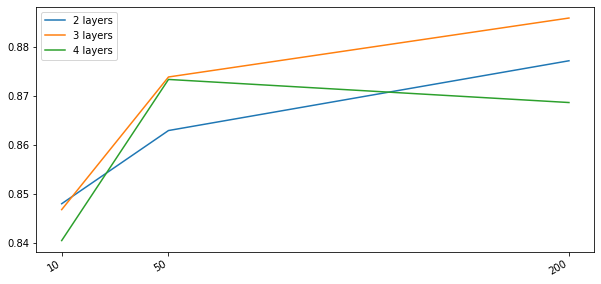

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(Unit,df[2], label='2 layers')
plt.plot(Unit,df[3], label='3 layers')
plt.plot(Unit,df[4], label='4 layers')
plt.xticks(Unit)
plt.legend(fontsize=10)
plt.gcf().autofmt_xdate()

### As the graph and summary shown, we know that the highest accuracy is about 0.88% with three layers and 200 neurons for each layer.

# Extra credit
- Do a more extensive experiment
    - More layers
    - More choices for number of units per layer
    - Vary number of units per layer
        - Increase number of units with increasing layer number
        - Decrease number of units with increasing layer number
        - Find some other pattern for varying the number of units per layer
- Comment on when your models are either overfitting or underfitting
    - Use numeric justification
    

### Keep the number of units same with increasing layer number

In [0]:
Unit2 = [10,50,100,200,300]
Layer2 = [2,3,4,5,6]
df2 = pd.DataFrame(columns=Layer2, index=Unit2)

In [48]:
for i in Unit2:
    for j in Layer2:
        # create a sequential model
        model = Sequential()
        for k in range(j-1):
            model.add(layers.Dense(i, activation=tf.nn.relu, input_dim=input_size))
        model.add(layers.Dense(output_size, activation="sigmoid"))
        
        # compile and fit model
        metrics = [ "acc" ]
        model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=metrics)
        model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks)
        
        # print summary()
        print(model.summary())
        
        # evaluate model using test set
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print("Test dataset: loss={tl:5.4f}, accuracy={ta:5.4f}".format(tl=test_loss, ta=test_accuracy))
               
        df2.loc[i,j]=test_accuracy
        
        if accuracy < test_accuracy:
            accuracy = test_accuracy
            myModel = model

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7137 - acc: 0.7483 - val_loss: 0.4983 - val_acc: 0.8355
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4812 - acc: 0.8353 - val_loss: 0.4540 - val_acc: 0.8498
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4534 - acc: 0.8446 - val_loss: 0.4431 - val_acc: 0.8457
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4373 - acc: 0.8502 - val_loss: 0.4346 - val_acc: 0.8520
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4290 - acc: 0.8524 - val_loss: 0.4532 - val_acc: 0.8458
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4198 - acc: 0.8552 - val_loss: 0.4238 - val_acc: 0.8542
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4157 - acc: 0.8559 - val_loss: 0.4632 - val_acc: 0.8413
Epoch 8/10
1688/1688 [==============================] - 4s 2ms

### Accuracy Table

In [49]:
df2

,2,3,4,5,6
10,0.8414,0.8475,0.8436,0.8457,0.8394
50,0.8678,0.8671,0.8689,0.8782,0.8637
100,0.8762,0.8741,0.8766,0.8831,0.8744
200,0.8825,0.8799,0.8748,0.8849,0.8793
300,0.8827,0.8861,0.8815,0.884,0.8783


### Current Hightest Accuracy and Its Model

In [50]:
print(accuracy)
print(myModel.summary())

0.8860999941825867
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_347 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_348 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_349 (Dense)            (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
None


### Graphing

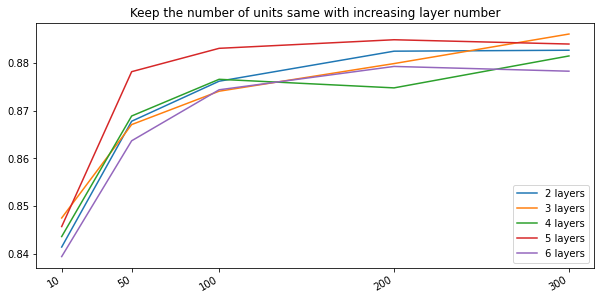

In [51]:
plt.figure(figsize=(10, 5))
for i in Layer2:
    label = '{0} layers'.format(i)
    plt.plot(Unit2,df2[i], label=label)
plt.xticks(Unit2)
plt.title('Keep the number of units same with increasing layer number')
plt.legend(fontsize=10)
plt.gcf().autofmt_xdate()

### Summary: The model overfits when there is a significant drop in test accuracy score, and underfits if there is a significant increase in test accuracy. From the graph we know that, for each different layer-models, they would be underfitted from the number of neurons increase from 10 to 50 , and they underfits from 100 to 200.

### Increase the number of units same with increasing layer number

In [0]:
Unit3 = [10,50,100,200,300]
Layer3 = [3,4,5,6]
df3 = {}

In [53]:
for j in Layer3:
    # create a sequential model
    model = Sequential()
    i = 0
    for k in range(j-1):
        hidden = Unit3[i]
        model.add(layers.Dense(hidden, activation=tf.nn.relu, input_dim=input_size))
        i += 1
    model.add(layers.Dense(output_size, activation="sigmoid"))

    # compile and fit model
    metrics = [ "acc" ]
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=metrics)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks)

    # print summary()
    print(model.summary())

    # evaluate model using test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test dataset: loss={tl:5.4f}, accuracy={ta:5.4f}".format(tl=test_loss, ta=test_accuracy))

    df3[j]=test_accuracy
        
    if accuracy < test_accuracy:
        accuracy = test_accuracy
        myModel = model

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6575 - acc: 0.7591 - val_loss: 0.4884 - val_acc: 0.8320
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4526 - acc: 0.8378 - val_loss: 0.4206 - val_acc: 0.8488
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4146 - acc: 0.8501 - val_loss: 0.4184 - val_acc: 0.8503
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3946 - acc: 0.8563 - val_loss: 0.3938 - val_acc: 0.8583
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3808 - acc: 0.8620 - val_loss: 0.3875 - val_acc: 0.8592
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3687 - acc: 0.8658 - val_loss: 0.3842 - val_acc: 0.8630
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3610 - acc: 0.8689 - val_loss: 0.3725 - val_acc: 0.8667
Epoch 8/10
1688/1688 [==============================] - 4s 2ms

### Accuracy Table

In [54]:
df3

{3: 0.86080002784729,
 4: 0.8604999780654907,
 5: 0.8519999980926514,
 6: 0.8543999791145325}

In [55]:
# Compare with df2
df2

,2,3,4,5,6
10,0.8414,0.8475,0.8436,0.8457,0.8394
50,0.8678,0.8671,0.8689,0.8782,0.8637
100,0.8762,0.8741,0.8766,0.8831,0.8744
200,0.8825,0.8799,0.8748,0.8849,0.8793
300,0.8827,0.8861,0.8815,0.884,0.8783


### Current Highest Accuracy and Its Model

In [56]:
print(accuracy)
print(myModel.summary())

0.8860999941825867
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_347 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_348 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_349 (Dense)            (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
None


### Summary: in this model, the number of unites in each layer of each model is following: 2L-Model=[10,10], 3L-Model=[10,50,10], 4L-Model=[10,50,100,10], 5L-Model=[10,50,100,200,10], 6L-Model=[10,50,100,200,300,10].

### As we see, when neurons increase, 3L-Model underfits with same neuron number in each layer and has better performance in increasing neuron one; and with the same analysis, 4L-Model and 5L-Model overfits with increasing neurons models, but overall to 6L-Model, increasing neuron model overfits as well even though it underfits with 10 neurons in each layer model.

### Decrease the number of units same with increasing layer number

In [0]:
Unit4 = [300,200,100,50,10]
Layer4 = [3,4,5,6]
df4 = {}

In [58]:
for j in Layer4:
    # create a sequential model
    model = Sequential()

    for k in range(j-1):
        hidden = Unit4[k]
        model.add(layers.Dense(hidden, activation=tf.nn.relu, input_dim=input_size))
        
    model.add(layers.Dense(output_size, activation="sigmoid"))

    # compile and fit model
    metrics = [ "acc" ]
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=metrics)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),callbacks=callbacks)

    # print summary()
    print(model.summary())

    # evaluate model using test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print("Test dataset: loss={tl:5.4f}, accuracy={ta:5.4f}".format(tl=test_loss, ta=test_accuracy))

    df4[j]=test_accuracy
        
    if accuracy < test_accuracy:
        accuracy = test_accuracy
        myModel = model

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5053 - acc: 0.8178 - val_loss: 0.3896 - val_acc: 0.8590
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3716 - acc: 0.8630 - val_loss: 0.3540 - val_acc: 0.8730
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3316 - acc: 0.8772 - val_loss: 0.3474 - val_acc: 0.8768
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3095 - acc: 0.8857 - val_loss: 0.3347 - val_acc: 0.8792
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2875 - acc: 0.8924 - val_loss: 0.3417 - val_acc: 0.8787
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2717 - acc: 0.8991 - val_loss: 0.2982 - val_acc: 0.8937
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2585 - acc: 0.9023 - val_loss: 0.3275 - val_acc: 0.8795
Epoch 8/10
1688/1688 [==============================] - 4s 2ms

### Accuracy Table

In [59]:
df4

{3: 0.8799999952316284, 4: 0.883400022983551, 5: 0.875, 6: 0.8779000043869019}

In [60]:
# Compare with df2
df2

,2,3,4,5,6
10,0.8414,0.8475,0.8436,0.8457,0.8394
50,0.8678,0.8671,0.8689,0.8782,0.8637
100,0.8762,0.8741,0.8766,0.8831,0.8744
200,0.8825,0.8799,0.8748,0.8849,0.8793
300,0.8827,0.8861,0.8815,0.884,0.8783


### Current Highest Accuracy and Its Model

In [61]:
print(accuracy)
print(myModel.summary())

0.8860999941825867
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_347 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_348 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_349 (Dense)            (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
None


### Summary: in this model, the number of unites in each layer of each model is following: 3L-Model=[300,200,10], 4L-Model=[300,200,100,10], 5L-Model=[300,200,100,50,10], 6L-Model=[300,200,100,50,10,10].

### As we see, when neurons increase, 3L-Model overfits with same neuron number (300) in each layer and has better performance in decreasing neuron one; and with the same analysis, 4L-Model, 5L-Model, 6L-Model underfits with decreasing neurons models.

**The Information of the Best Model**

In [62]:
print(accuracy)
print(myModel.summary())

0.8860999941825867
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_347 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_348 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_349 (Dense)            (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
None


## Additional Submission

In [63]:
import os
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
import seaborn as sns
from sklearn.metrics import confusion_matrix

modelName = "assignment3_best_model"
model_path = os.path.join(".", modelName)     

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(X_test, Y_test, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)
    
    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    predictions = model.predict(X_test).argmax(1)
    
    confusion = confusion_matrix(predictions,y_test)
    df_cm = pd.DataFrame(confusion,index = [i for i in range(1, 11)],
                  columns = [i for i in range(1,11)])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm,annot = True, cmap="Blues")
    plt.show()
    print(model.summary())
    
    return predictions

# ------------------------------------------------------------------------------------ #
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Determine 
# - the dimensions of the input by examining the first training example
# - the dimensions of the output (number of classes) by examinimg the targets
input_size = np.prod(X_train[0].shape)
output_size = np.unique(y_train).shape[0]

# input image dimensions
img_rows, img_cols = X_train[0].shape[0:2]

valid_size = X_train.shape[0] // 10

# Flatten the data to one dimension and normalize to range [0,1]
X_train = X_train.astype(np.float32).reshape(-1, input_size) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, input_size) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:valid_size], X_train[valid_size:]
y_valid, y_train = y_train[:valid_size], y_train[valid_size:]

# ------------------------------------------------------------------------------------ #

#saveModel(myModel, model_path)

# prediction
MyModel(X_test,y_test,model_path)



Directory ./assignment3_best_model already exists, files will be over-written.
Model saved in directory ./assignment3_best_model; create an archive of this directory and submit with your assignment.


In [64]:
print('Done!')

Done!
